In [7]:
a = dict(one=1, two=2, three=3) 
b = {'one': 1, 'two': 2, 'three': 3} 
c = dict(zip(['one', 'two', 'three'], [1, 2, 3])) 
d = dict([('two', 2), ('one', 1), ('three', 3)]) 
e = dict({'three': 3, 'one': 1, 'two': 2})

print(id(a))
print(id(b))
print(id(c))
print(id(d))
print(id(e))
a == b == c == d == e

2238288751352
2238288921800
2238288752504
2238288751280
2238288750560


True

# 泛映射类型

<br>标准库里的所有映射类型都是利用 dict 来实现的，因此它们有个共同的限制，即只有可 散列的数据类型才能用作这些映射里的键（只有键有这个要求，值并不需要是可散列的数据类型）。</br>
<br>可散列的数据类型：关于可散列的数据类型的定义有这样的一段话，
><br>如果一个对象是可散列的，那么在这个对象的生命周期中，它的散列值是不变 的，而且这个对象需要实现 __hash__() 方法。另外可散列对象还要有 __qe__() 方法，这样才能跟其他键做比较。如果两个可散列对象是相等的，那么它们的散列值一定是一样的……</br>

<br>原子不可变的数据类型(str、bytes和数值类型）都是可散列类型，frozenset也是可散列的，而元组，只有当元组所包含的所有元素都是可散列的时候，它才是可散列的。</br>

**下面一个例子证明了元组确实只有当它的全部元素是可散列的它才是可散列的**

```
>>> tt = (1, 2, (30, 40)) 
>>> hash(tt) 8027212646858338501 
>>> tl = (1, 2, [30, 40]) 
>>> hash(tl) Traceback (most recent call last):  File "<stdin>", line 1, in <module> TypeError: unhashable type: 'list' 
>>> tf = (1, 2, frozenset([30, 40])) 
>>> hash(tf) 
-4118419923444501110
```

**注意：说“Python 里所有的不可 变类型都是可散列的”。这个说法其实是不准确的，比如虽然元组本身是不可变序 列，它里面的元素可能是其他可变类型的引用。**

# 字典的推导

**下面是一个简单的代码展示了字典中推导式的使用**

```
>>> DIAL_CODES = [                 
...         (86, 'China'), 
...         (91, 'India'), 
...         (1, 'United States'), 
...         (62, 'Indonesia'), 
...         (55, 'Brazil'), 
...         (92, 'Pakistan'), 
...         (880, 'Bangladesh'), 
...         (234, 'Nigeria'), 
...         (7, 'Russia'), 
...         (81, 'Japan'), 
...     ] 
>>> country_code = {country: code for code, country in DIAL_CODES}   
>>> country_code {'China': 86, 'India': 91, 'Bangladesh': 880, 'United States': 1, 'Pakistan': 92, 'Japan': 81, 'Russia': 7, 'Brazil': 55, 'Nigeria': 234, 'Indonesia': 62} 
>>> {code: country.upper() for country, code in country_code.items()   
...   if code < 66} 
{1: 'UNITED STATES', 55: 'BRAZIL', 62: 'INDONESIA', 7: 'RUSSIA'}
```

# 在字典中使用setdefault方法(它处理找不到的键)

<br>当字典 d[k] 不能找到正确的键的时候，Python 会抛出异常，这个行为符合 Python 所信奉 的“快速失败”哲学。也许每个 Python 程序员都知道可以用 d.get(k, default) 来代替 d[k]，给找不到的键一个默认的返回值（这比处理 KeyError 要方便不少）。但是要更 新某个键对应的值的时候，不管使用 __getitem__ 还是 get 都会不自然，而且效率低。 </br>
<br>以下俩中代码起到的效果是一样的</br>

`my_dict.setdefault(key, []).append(new_value)`

```
if key not in my_dict:    
    my_dict[key] = [] 
    my_dict[key].append(new_value)
``` 

**虽然上面俩对代码所起的效果是一样的，但是显然第一种的效率更高，因为后者至少要进行俩次键查询（而如果不存在则要进行三次），而用setdefault不管原来的字典是什么情况都只要一次就够了**

<br> setdefault的工作原理：先查找键值，找不到则将一个空列放入其中返回，如果找得到的话直接返回键值 </br>

# 映射的弹性键查询
<br> 有时候为了方便起见，就算某个键在映射里不存在，我们也希望在通过这个键读取值的时 候能得到一个默认值。</br>

<br> 有两个途径能帮我们达到这个目的</br>
1. 是通过 defaultdict 这 个类型而不是普通的 dict。
2. 自己定义一个 dict 的子类，然后在子类中实现 __missing__ 方法。

### defaultdict：处理找不到的键的一个选择 
<br> 在用户创建 defaultdict 对象的时候，就需要给它配置一个为找不到的键创造默认值的方法。</br>
<br> 具体而言，在实例化一个 defaultdict 的时候，需要给构造方法提供一个可调用对象， 这个可调用对象会在 __getitem__ 碰到找不到的键的时候被调用，让 __getitem__ 返 回某种默认值。</br>
<br>比如，我们新建了这样一个字典：dd = defaultdict(list)，如果键 'new-key' 在 dd 中还不存在的话，表达式 dd['new-key'] 会按照以下的步骤来行事。 </br>
1. 调用 list() 来建立一个新列表。 
2. 把这个新列表作为值，'new-key' 作为它的键，放到 dd 中。
3. 返回这个列表的引用。

**用来生成默认值的可调用对象存放在名为 default_factory 的实例属性里。**
<br> **注意：defaultdict 里的 default_factory 只会在 __getitem__ 里被调用，在 其他的方法里完全不会发挥作用。比如，dd 是个 defaultdict，k 是个找不到的 键， dd[k] 这个表达式会调用 default_factory 创造某个默认值，而 dd.get(k) 则会返回 None。**</br>

### 特殊方法__missing__ 
<br> __miss__只会被__getitem__调用，这点和defaultdict中的default_factory只对__getitem__有作用一样，对于get或者__contains__这些方法的使用没有影响</br>
<br>这里是一种自定义的字典类型，这种字典会在键查不到的时候将它转换为字符串，下面的代码是演示了这种字典的效果</br>
```
>>> d = StrKeyDict0([('2', 'two'), ('4', 'four')])    
>>> d['2']    
'two'    
>>> d[4]    
'four'    
>>> d[1]    
Traceback (most recent call last):      
                        ...    KeyError: '1'

>>> d.get('2')    
'two'    
>>> d.get(4)    
'four'    
>>> d.get(1, 'N/A')    
'N/A'

>>> 2 in d    
True    
>>> 1 in d    
False
```
下面是StrKeyDict这个类的实现：
```
class StrKeyDict0(dict):  
    def __missing__(self, key):        
        if isinstance(key, str):              
            raise KeyError(key)        
        return self[str(key)]
        
def get(self, key, default=None):        
    try:            
        return self[key]   
    except KeyError:        
        return default  
        
def __contains__(self, key):    
    return key in self.keys() or str(key) in self.keys()  
```
**isinstance(key, str) 测试在上面的 __missing__ 中是必需的。**
<br>如果没有这个测试，只要 str(k) 返回的是一个存在的键，那么 __missing__ 方法是没 问题的，不管是字符串键还是非字符串键，它都能正常运行。但是如果 str(k) 不是一个 存在的键，代码就会陷入无限递归。这是因为 __missing__ 的最后一行中的 self[str(key)] 会调用 __getitem__，而这个 str(key) 又不存在，于是 __missing__ 又会被调用。 </br>


# 字典的变种
<br>这一节总结了标准库里 collections 模块中，除了 defaultdict 之外的不同映射类型。</br>
- **collections.OrderedDict**: 
<br>这个类型在添加键的时候会保持顺序，因此键的迭代次序总是一致 的。OrderedDict 的 popitem 方法默认删除并返回的是字典里的最后一个元素，但是如 果像 my_odict.popitem(last=False) 这样调用它，那么它删除并返回第一个被添加进去的元素。</br>
- **collections.ChainMap**：
<br>没看懂！！！</br>
- **collections.Counter**：
<br>这个映射类型会给键准备一个整数计数器。每次更新一个键的时候都会增加这个计数 器。所以这个类型可以用来给可散列表对象计数，或者是当成多重集来用——多重集合就 是集合里的元素可以出现不止一次。Counter 实现了 + 和 - 运算符用来合并记录，还有 像 most_common([n]) 这类很有用的方法。most_common([n]) 会按照次序返回映射里 最常见的 n 个键和它们的计数。</br>
```
>>> ct = collections.Counter('abracadabra') 
>>> ct Counter({'a': 5, 'b': 2, 'r': 2, 'c': 1, 'd': 1}) 
>>> ct.update('aaaaazzz') 
>>> ct 
Counter({'a': 10, 'z': 3, 'b': 2, 'r': 2, 'c': 1, 'd': 1}) 
>>> ct.most_common(2) 
[('a', 10), ('z', 3)]
```

- **collections.UserDict**: 给用户进行定义的。

# 子类化UserDict
<br>就创造自定义映射类型来说，以 UserDict 为基类，总比以普通的 dict 为基类要来得方 便。</br>
<br> 从 UserDict 而不是从 dict 继承的主要原因是，后者有时会在某些方法的实 现上走一些捷径，导致我们不得不在它的子类中重写这些方法，但是 UserDict 就不会带 来这些问题。</br>

# 不可变映射的类型
<br>标准库里所有的映射类型都是可变的，有时候你有这样的需求，比如不能让用户错误地修改某个映射。</br>
<br>types 模块中引入了一个封装类名叫 MappingProxyType。如果给这 个类一个映射，它会返回一个只读的映射视图。虽然是个只读视图，但是它是动态的。这意味着如果对原映射做出了改动，我们通过这个视图可以观察到，但是无法通过这个视图 对原映射做出修改。</br>

<br>**下面的代码简单的演示了MappingProxyType的用法：**</br>
```
>>> from types import MappingProxyType 
>>> d = {1:'A'} 
>>> d_proxy = MappingProxyType(d) 
>>> d_proxy mappingproxy({1: 'A'}) 
>>> d_proxy[1]  
'A' 
>>> d_proxy[2] = 'x'   
Traceback (most recent call last):  
    File "<stdin>", line 1, in <module> TypeError: 'mappingproxy' object does not support item assignment 
>>> d[2] = 'B' 
>>> d_proxy   
mappingproxy({1: 'A', 2: 'B'}) 
>>> d_proxy[2] 
'B'
```

# 集合

<br> 集合中的元素必须是可散列的，set 类型本身是不可散列的，但是 frozenset 可以。因 此可以创建一个包含不同 frozenset 的 set。 </br>

<br> 除了保证唯一性，集合还实现了很多基础的中缀运算符。给定两个集合 a 和 b，a | b 返 回的是它们的合集，a & b 得到的是交集，而 a - b 得到的是差集。合理地利用这些操 作，不仅能够让代码的行数变少，还能减少 Python 程序的运行时间。</br>

<br>集合的语法陷阱：除空集之外，集合的字面量——{1}、{1, 2}，等等——看起来跟它的数学形式一模一 样。如果是空集，那么必须写成 set() 的形式。
不要忘了，如果要创建一个空集，你必须用不带任何参数的构造方法 set()。如果只 是写成 {} 的形式，跟以前一样，你创建的其实是个空字典。 </br>

<br> 像 {1, 2, 3} 这种字面量句法相比于构造方法（set([1, 2, 3])）要更快且更易读。 后者的速度要慢一些，因为 Python 必须先从 set 这个名字来查询构造方法，然后新建一 个列表，最后再把这个列表传入到构造方法里。</br>

<br>**frozenset的创建方式：</br>
```
>>> frozenset(range(10)) 
frozenset({0, 1, 2, 3, 4, 5, 6, 7, 8, 9})
```
### 集合推导 
<br> 集合推导跟列表推导的差别不大</br>

# dict和set
<br> 字典和集合的速度是非常快的。</br>

## 字典中的散列表
散列表其实是一个稀疏数组（总是有空白元素的数组称为稀疏数组）。
<br>**注意：因为 Python 会设法保证大概还有三分之一的表元是空的，所以在快要达到这个阈值的时 候，原有的散列表会被复制到一个更大的空间里面。**</br>

1. 散列值和相等性:
<br>内置的 hash() 方法可以用于所有的内置类型对象。如果是自定义对象调用 hash() 的话，实际上运行的是自定义的__hash__。如果两个对象在比较的时候是相等的， 那它们的散列值必须相等，否则散列表就不能正常运行了。例如，如果 1 == 1.0 为真，那么 hash(1) == hash(1.0) 也必须为真，但其实这两个数字（整型和浮点） 的内部结构是完全不一样的。</br>

2. 散列表算法:

![avatar]
(C:\Users\86155\Desktop\截图\批注 2019-10-23 144313.png)


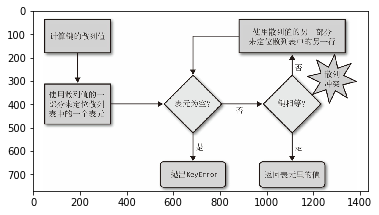

In [18]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np


lena = mpimg.imread(r'批注 2019-10-23 144313.png')
plt.imshow(lena)

<br>**在插入新值时，Python 可能会按照散列表的拥挤程度来决定是否要重新分配内存 为它扩容。**</br>
## 　dict的实现及其导致的结果 

1. 键必须是可散列的
一个可散列的对象必须满足以下要求。
    1. 支持 hash() 函数，并且通过 __hash__() 方法所得到的散列值是不变的。 
    2. 支持通过 __eq__() 方法来检测相等性。 
    3. 若 a == b 为真，则 hash(a) == hash(b) 也为真。 
所有由用户自定义的对象默认都是可散列的，因为它们的散列值由 id() 来获取，而 且它们都是不相等的。
2. 字典在内存上的开销巨大
<br> 由于字典使用了散列表，而散列表又必须是稀疏的，这导致它在空间上的效率低下。</br>
3. 键查询很快 
<br> dict 的实现是典型的空间换时间</br>
4.  键的次序取决于添加顺序
<br>当往 dict 里添加新键而又发生散列冲突的时候，新键可能会被安排存放到另一个位 置。于是下面这种情况就会发生：由 dict([key1, value1), (key2, value2)] 和 dict([key2, value2], [key1, value1]) 得到的两个字典，在进行比较的时 候，它们是相等的；但是如果在 key1 和 key2 被添加到字典里的过程中有冲突发生 的话，这两个键出现在字典里的顺序是不一样的。</br>
5. 往字典里添加新键可能会改变已有键的顺序 
<br>无论何时往字典里添加新的键，Python 解释器都可能做出为字典扩容的决定。扩容导 致的结果就是要新建一个更大的散列表，并把字典里已有的元素添加到新表里。这个 过程中可能会发生新的散列冲突，导致新散列表中键的次序变化。</br>
<br>如果你在迭代一个字典的所有键的过程中同 时对字典进行修改，那么这个循环很有可能会跳过一些键——甚至是跳过那些字典中 已经有的键。
由此可知，不要对字典同时进行迭代和修改。</br>

##  set的实现以及导致的结果
set 和 frozenset 的实现也依赖散列表，但在它们的散列表里存放的只有元素的引用 （就像在字典里只存放键而没有相应的值）。

# 集合、散列表和字典的特点

- 集合里的元素必须是可散列的。
